In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer

In [2]:
data = pd.read_csv('../data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [3]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target and position features (Long/Lat). Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target and positional values.

In [4]:
data.dropna(subset=['Price', 'Longtitude', 'Lattitude'], axis=0, inplace=True)

# Features that do not affect the price
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

# Features that had 2/3 of missing data. Data filling methods at this point are useless
data.drop(['YearBuilt', 'BuildingArea'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988,Yarraville,78 Bayview Rd,3,h,1101000.0,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
20989,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
20990,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
20991,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [5]:
geo_features = ['Longtitude', 'Lattitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

Filling th rest of the missing data with:
- median value (numerical features)
- "forward fill" (categorical features)

In [6]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].median())

cat_data = data[cat_feat]
num_data = data[num_feat]

/tmp/ipykernel_7665/1205132683.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f] = data[f].fillna(method='ffill')


In [7]:
data.isna().sum(axis=0)

Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Regionname       0
Propertycount    0
dtype: int64

## Data preprocessing

Target distribution skew:  2.472900878148523


(array([1.4109e+04, 5.8390e+03, 8.2400e+02, 1.5400e+02, 4.8000e+01,
        1.4000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

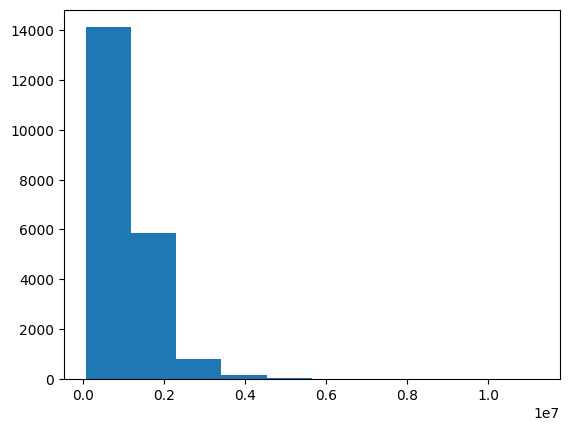

In [8]:
import matplotlib.pyplot as plt

print("Target distribution skew: ", data["Price"].skew())
plt.hist(data['Price'])

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range (including other numerical features).

Target distribution skew:  1.140795739766696


(array([ 568., 4592., 5467., 3285., 2408., 1359.,  705.,  470.,  243.,
         170.]),
 array([  85000.,  380500.,  676000.,  971500., 1267000., 1562500.,
        1858000., 2153500., 2449000., 2744500., 3040000.]),
 <BarContainer object of 10 artists>)

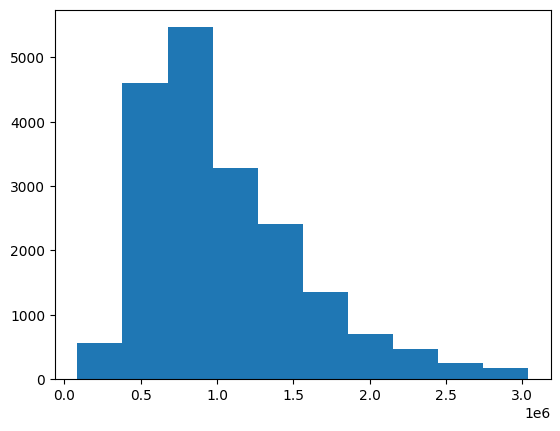

In [9]:
from scipy import stats

num_data = num_data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]

target = num_data["Price"]
num_data.drop(columns=["Price"], inplace=True)

print("Target distribution skew: ", target.skew())
plt.hist(target)

In [10]:
data = pd.concat([num_data, cat_data.iloc[num_data.index]], axis=1)
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Type,Regionname
0,2,2.5,2.0,1.0,1.0,202.0,4019.0,h,Northern Metropolitan
1,2,2.5,2.0,1.0,0.0,156.0,4019.0,h,Northern Metropolitan
2,3,2.5,3.0,2.0,0.0,134.0,4019.0,h,Northern Metropolitan
3,3,2.5,3.0,2.0,1.0,94.0,4019.0,h,Northern Metropolitan
4,4,2.5,3.0,1.0,2.0,120.0,4019.0,h,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
20988,3,6.3,3.0,1.0,2.0,288.0,6543.0,h,Western Metropolitan
20989,4,6.3,4.0,1.0,3.0,593.0,6543.0,h,Western Metropolitan
20990,2,6.3,2.0,2.0,1.0,98.0,6543.0,h,Western Metropolitan
20991,2,6.3,2.0,1.0,2.0,220.0,6543.0,t,Western Metropolitan


In [11]:
position_data

,Longtitude,Lattitude,CouncilArea,Address,Suburb
0,144.99840,-37.79960,Yarra City Council,85 Turner St,Abbotsford
1,144.99340,-37.80790,Yarra City Council,25 Bloomburg St,Abbotsford
2,144.99440,-37.80930,Yarra City Council,5 Charles St,Abbotsford
3,144.99690,-37.79690,Yarra City Council,40 Federation La,Abbotsford
4,144.99410,-37.80720,Yarra City Council,55a Park St,Abbotsford
...,...,...,...,...,...
20988,144.88516,-37.81095,Maribyrnong City Council,78 Bayview Rd,Yarraville
20989,144.88467,-37.81053,Maribyrnong City Council,13 Burns St,Yarraville
20990,144.88826,-37.81551,Maribyrnong City Council,29A Murray St,Yarraville
20991,144.87856,-37.82286,Maribyrnong City Council,147A Severn St,Yarraville


In [12]:
print(geo_features)
position_data = position_data.iloc[data.index].reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

['Longtitude', 'Lattitude', 'CouncilArea', 'Address', 'Suburb']


Standardize numerical features using the Standard Scaler

In [13]:
num_feat.remove('Price')
std_scaler = StandardScaler()
norm = Normalizer()

data[num_feat] = std_scaler.fit_transform(data[num_feat])
# data[num_feat] = norm.fit_transform(data[num_feat])
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Type,Regionname
0,-1.126001,-1.384247,-1.123999,-0.868172,-0.764542,-0.585494,-0.813574,h,Northern Metropolitan
1,-1.126001,-1.384247,-1.123999,-0.868172,-1.955939,-0.677778,-0.813574,h,Northern Metropolitan
2,0.005816,-1.384247,0.017537,0.750316,-1.955939,-0.721913,-0.813574,h,Northern Metropolitan
3,0.005816,-1.384247,0.017537,0.750316,-0.764542,-0.802159,-0.813574,h,Northern Metropolitan
4,1.137632,-1.384247,0.017537,-0.868172,0.426855,-0.749999,-0.813574,h,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
19262,0.005816,-0.758787,0.017537,-0.868172,0.426855,-0.412965,-0.152671,h,Western Metropolitan
19263,1.137632,-0.758787,1.159074,-0.868172,1.618252,0.198912,-0.152671,h,Western Metropolitan
19264,-1.126001,-0.758787,-1.123999,0.750316,-0.764542,-0.794135,-0.152671,h,Western Metropolitan
19265,-1.126001,-0.758787,-1.123999,-0.868172,0.426855,-0.549384,-0.152671,t,Western Metropolitan


One-hot encoding is applied to categorical features "Regionname" and "Type"

In [14]:
ohe = OneHotEncoder()

encoded_cat = ohe.fit_transform(data[cat_feat])
encoded_cat = pd.DataFrame(encoded_cat.todense())
data.drop(cat_feat, axis=1, inplace=True)

data = pd.concat([data, encoded_cat], axis=1)
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-1.126001,-1.384247,-1.123999,-0.868172,-0.764542,-0.585494,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.126001,-1.384247,-1.123999,-0.868172,-1.955939,-0.677778,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.005816,-1.384247,0.017537,0.750316,-1.955939,-0.721913,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.005816,-1.384247,0.017537,0.750316,-0.764542,-0.802159,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.137632,-1.384247,0.017537,-0.868172,0.426855,-0.749999,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19262,0.005816,-0.758787,0.017537,-0.868172,0.426855,-0.412965,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19263,1.137632,-0.758787,1.159074,-0.868172,1.618252,0.198912,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19264,-1.126001,-0.758787,-1.123999,0.750316,-0.764542,-0.794135,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19265,-1.126001,-0.758787,-1.123999,-0.868172,0.426855,-0.549384,-0.152671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Building edge index

Generate edge index for our graph of real estate.<br>
Creates edge between two entities, if distance between them is under the predefined threshold

In [15]:
import sys
from pathlib import Path
import os

sys.path.append( (Path(os.getcwd()).parent).as_posix() )

In [16]:
import os
import pickle
from src.encoders.dist_encoder import threshold_edges

edge_index_file = "cache/edge_index.pickle"
EDGE_CREATING_DISTANCE = 0.3

if os.path.exists(edge_index_file):
    with open(edge_index_file, 'rb') as f:
        edge_index = pickle.load(f)
else:
    position_data.rename(columns={'Lattitude': 'lat', 'Longtitude': 'long'}, inplace=True)
    edge_index = threshold_edges(position_data, EDGE_CREATING_DISTANCE)
    
    with open(edge_index_file, "wb") as output:
        pickle.dump(edge_index, output)

In [17]:
edge_index.shape

torch.Size([2, 93426])

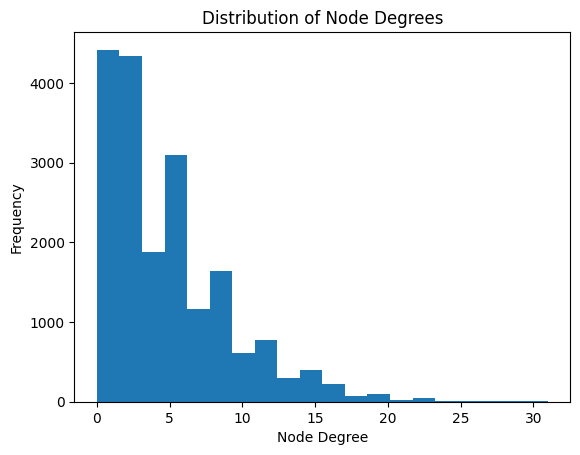

In [18]:
import torch_geometric.utils as utils
import matplotlib.pyplot as plt

degrees = utils.degree(edge_index[0])

degrees_np = np.array([int(deg) for deg in degrees])
plt.hist(degrees_np, bins=20)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Distribution of Node Degrees')
plt.show()

The lastly ploted target distribution PDF, looked like exponential distribution. In order to make the learning process easier, we can train our Network on log-transformed targets.

In [19]:
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-1.126001,-1.384247,-1.123999,-0.868172,-0.764542,-0.585494,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.126001,-1.384247,-1.123999,-0.868172,-1.955939,-0.677778,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.005816,-1.384247,0.017537,0.750316,-1.955939,-0.721913,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.005816,-1.384247,0.017537,0.750316,-0.764542,-0.802159,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.137632,-1.384247,0.017537,-0.868172,0.426855,-0.749999,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19262,0.005816,-0.758787,0.017537,-0.868172,0.426855,-0.412965,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19263,1.137632,-0.758787,1.159074,-0.868172,1.618252,0.198912,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19264,-1.126001,-0.758787,-1.123999,0.750316,-0.764542,-0.794135,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19265,-1.126001,-0.758787,-1.123999,-0.868172,0.426855,-0.549384,-0.152671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Create DataLoader which will produce mini batches for Network learning. Number of neighbor hops (and number of fetched neighbours in each hop) should be specified in arguments, in order to control the scope of influence on target-node embedding. <br>
Also, creates custom data-splitter for dividing data into train/val/test parts (available through boolean masks for node index).

In [20]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomNodeSplit

g_data = Data(
    torch.tensor(data.to_numpy(), dtype=torch.float32),
    edge_index=edge_index,
    # y=torch.tensor(np.log(target.to_numpy().reshape((-1, 1))), dtype=torch.float32)
    y=torch.tensor(target.to_numpy().reshape((-1, 1)), dtype=torch.float32)
)

node_splitter = RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = node_splitter(g_data)

data_loader = NeighborLoader(graph,
                             input_nodes=graph.train_mask,
                             batch_size=256,
                             num_neighbors=[10, 5],
                             shuffle=True,)

/home/artem/uni/kopyl2024/venv/lib64/python3.12/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


## Applying GNN

In [21]:
import torch
import torch.nn as nn
import torch_geometric.nn as nn_geom
from torch_geometric.data import Data

class Net(nn.Module):
    def __init__(self, input_size: int, hidden_layer: int):
        super().__init__()
        self.conv1 = nn_geom.SAGEConv(input_size, hidden_layer)
        self.conv2 = nn_geom.SAGEConv(hidden_layer, hidden_layer)
        
        self.dropout = nn.Dropout(p=0.3)

        self.linear1 = nn.Linear(hidden_layer, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, hidden_layer)
        self.linear3 = nn.Linear(hidden_layer, hidden_layer)
        self.linear4 = nn.Linear(hidden_layer, 1)

    
    def forward(self, data: Data, edge_index: torch.Tensor) -> torch.Tensor:
        x = self.conv1(data, edge_index).relu()
        x = self.conv2(x, edge_index).relu()

        x = self.linear1(x).relu()
        x = self.dropout(x) 
        x = self.linear2(x).relu()
        x = self.dropout(x) 
        x = self.linear3(x).relu()
        x = self.dropout(x) 

        return self.linear4(x)

In [22]:
model = Net(graph.x.shape[1], 128)

loss_criteria = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)


In [23]:
model

Net(
  (conv1): SAGEConv(18, 128, aggr=mean)
  (conv2): SAGEConv(128, 128, aggr=mean)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear1): Linear(in_features=128, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=1, bias=True)
)

`IMPORTANT`: it was assured in practice, that during learning cycle we should work with the loss only on batch nodes (excluding fetched neighbours). Each batch will be extended with additional node neighbours (in order to improve their embedding), although we should not take into account prediction on those neighbors, since it will make the loss value not representitive of the current batch nodes. PyG appends additive neighbours to the batch => calculate loss only on the first [__batch_size__] nodes

In [24]:
import math
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

n_epochs = 200
best_mse, best_weights = math.inf, None

for epoch in range(n_epochs):
    model.train()
    for batch in data_loader:
        optim.zero_grad()
        out = model(batch.x, batch.edge_index)

        y = batch.y[:batch.batch_size] 
        out = out[:batch.batch_size]
        loss = loss_criteria(out, y)

        loss.backward()
        optim.step()

    model.eval()
    with torch.no_grad():
        predicts = model(graph.x, graph.edge_index)
        mse = loss_criteria(predicts[graph.val_mask], graph.y[graph.val_mask])
        r2 = r2_score(graph.y[graph.val_mask].detach(), predicts[graph.val_mask].detach())    
        print(f'Epoch #{epoch} | Loss = {mse:.4e} | R^2 = {r2}')
        
    if mse < best_mse:
        best_mse, best_weights = mse, model.state_dict()

Epoch #0 | Loss = 1.3292e+12 | R^2 = -4.002167737797097
Epoch #1 | Loss = 2.8825e+11 | R^2 = -0.08476395871022024
Epoch #2 | Loss = 2.2297e+11 | R^2 = 0.16093389726385876
Epoch #3 | Loss = 1.8483e+11 | R^2 = 0.3044337067152689
Epoch #4 | Loss = 1.5181e+11 | R^2 = 0.428723827195712
Epoch #5 | Loss = 1.2479e+11 | R^2 = 0.5303703495701071
Epoch #6 | Loss = 1.0831e+11 | R^2 = 0.5924141953840136
Epoch #7 | Loss = 9.9273e+10 | R^2 = 0.6264146369688688
Epoch #8 | Loss = 9.7021e+10 | R^2 = 0.6348884934311269
Epoch #9 | Loss = 9.4297e+10 | R^2 = 0.6451391910745548
Epoch #10 | Loss = 9.2935e+10 | R^2 = 0.6502646992628354
Epoch #11 | Loss = 9.2413e+10 | R^2 = 0.6522294314288973
Epoch #12 | Loss = 9.1970e+10 | R^2 = 0.653895540898034
Epoch #13 | Loss = 9.1252e+10 | R^2 = 0.656597830994591
Epoch #14 | Loss = 9.2499e+10 | R^2 = 0.6519046603054863
Epoch #15 | Loss = 9.0509e+10 | R^2 = 0.6593939991476715
Epoch #16 | Loss = 8.9570e+10 | R^2 = 0.6629296908697416
Epoch #17 | Loss = 9.0026e+10 | R^2 = 0.6

KeyboardInterrupt: 

In [25]:
graph.y

tensor([[1480000.],
        [1035000.],
        [1465000.],
        ...,
        [ 888000.],
        [ 705000.],
        [1020000.]])

In [26]:
# model.load_state_dict(best_weights)

model.eval()

predicts = model(graph.x, graph.edge_index).detach()
actual = graph.y

# predicts = model(graph.x, graph.edge_index)
# actual = graph.y

mse = loss_criteria(predicts[graph.test_mask], actual[graph.test_mask])
r2 = r2_score(actual[graph.test_mask].detach(), predicts[graph.test_mask].detach())

print(f'GNN : MSE_Loss = {mse:.4e} | R^2 = {r2}')

GNN : MSE_Loss = 7.4328e+10 | R^2 = 0.7334227785896895


## Regression plots

In [121]:
graph.y.numpy().max()

3040000.0

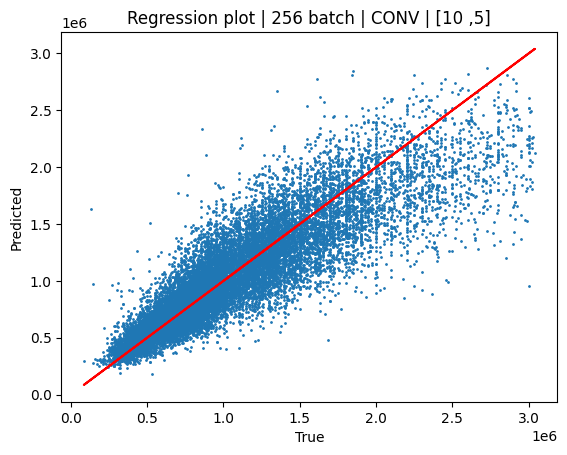

In [29]:
plt.title("Regression plot | 256 batch | CONV | [10 ,5]")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.scatter(actual, predicts, s=1)
plt.plot(actual, actual, 'r-')